#Task02 : Opimization : 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
test=pd.read_csv('https://raw.githubusercontent.com/ousama-88/prohack_dataset_fIZoqt7/master/test.csv')

In [ ]:
#y from notebook 2
our_best_y = pd.read_csv('https://raw.githubusercontent.com/ousama-88/prohack_dataset_fIZoqt7/ousama-88-patch-1/yturkey1.csv')

our solution for the optimization task was based on stable distribution of energy 

![Texte alternatif…](https://raw.githubusercontent.com/ousama-88/prohack_dataset_fIZoqt7/master/o.png)

We counted and found out that exists 67 countries with 'existence expectancy index' < 0.7.

In [ ]:
test['y'] = our_best_y
test['const'] = test['y'].apply(lambda x: ((3-np.log(x+0.01))**2)/1000)

test=test.sort_values(by='existence expectancy index')
test['smpl_opt_pred'] = 95 
from scipy.optimize import minimize

x0 = np.array(test['smpl_opt_pred'])
consts = np.array(test['const'])

def objective(x):
    return -x.dot(consts)

def constraint1(x):
    return 49999.99-sum(x)

def constraint2(x):
    return sum(x[:67])-4999.99

b = (0.0, 100.0)
bnds = (b,)*890

con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',
                    bounds=bnds,constraints=cons,
                    options={'maxiter': 232.5, 'ftol': 1e-08, 'eps': 1e-05})
x = solution.x
print('res:',objective(x))
print(list(x))

res: -1863.9124240916806
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 59.07882229654771, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 70.82213556271307, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.68193638735028, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 91.6272938664564, 82.58011722836315, 74.642295072881, 100.0, 100.0, 100.0, 89.97832478798588, 80.69031860546548, 100.0, 96.49376807359758, 100.0, 100.0, 88.65730325093499, 77.70117013279791, 98.13739870996561, 100.0, 100.0, 100.0, 93.38309018352138, 100.0, 100.0, 84.61477397979424, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 95.91002523956642, 100.0, 100.0, 98.64202438224369, 100.0, 94.9369664941253, 100.0, 100.0, 100.0, 100.0, 100.

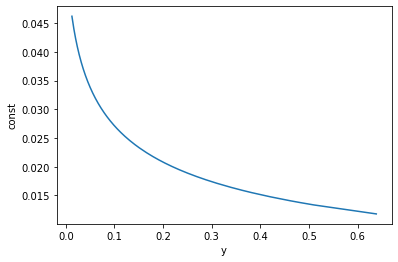

In [ ]:
sns.lineplot(x=test['y'],y=test['const'])

In [ ]:
test['opt_pred']=list(x)
test['index'] = test.index
evaln=test[['index','y','opt_pred']]
evaln=evaln.rename(columns={"y": "pred"})
increase = (test['opt_pred']*(test['const']))

print(sum(increase), test.loc[test['existence expectancy index'] < 0.7, 'opt_pred'].sum(), evaln['opt_pred'].sum())

1863.9124240916806 6529.5828942466105 49999.990003500156


In [ ]:
evaln=test[['index','y','opt_pred']]
evaln=evaln.rename(columns={"y": "pred"})

In [ ]:
evaln.to_csv('Subfinal.csv', index=False) 



---
final word ; ?
